# Simple Data Cleaning and Exploration

Dataset was provided as part of a recruitment drive by a Tech Consulting Company.
The dataset seems to have already been partially used in some analysis as evidenced
by the 'rpart','Adjusted Prob for 50% Cut-off (without Formulae)' and 'NPS' columns.
NPS seems to have been preprocessed to 1 (for scores 9-10), 0(for scores 7-8) and 
-1(for scores 0-6). The other two columns point to Recursive Partitioning to be the 
choice of classification.

In this python file, I perform some simple data imputing on missing values in addition to 
data cleaning for later processing by Logit Regression.

# Import Libraries


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

# Import Data

In [63]:
#Import and display Churn data

raw_data = pd.read_csv('ChurnData.csv')
raw_data

,Customer ID,Churned,Age,Average Bill over 6 months,Average Bill over 12 months,Number of defaults in last 12 bills,Payment Method,District,Area,Concesssion Card,...,rpart,Category of latest complaint,NPS,Product,Multiple Products,Product_New,Adjusted Prob for 50% Cut-off (without Formulae),Customer Segment,Product Category,Bill Amount
0,1,Yes,64.0,6.0000,123.0150,2,Credit Card,N,Northern Territory,No,...,0.357143,Network Coverage,-1,Internet Service,Yes,Mobile & Internet Service,0.838283,Independents,Internet,169
1,2,No,29.0,18.0000,26.4125,3,Cheque,S,South Australia,No,...,0.053805,Call Drop,0,Fixed Line,No,Fixed Line,0.346654,Small Business,ADSL,137
2,3,No,47.0,4.0000,108.9525,0,Cheque,Q,Queensland,No,...,0.030710,Data Charges,0,Mobile,No,Internet Service,0.228171,Independents,Fixed line,252
3,4,No,75.0,7.0000,106.0475,1,Cheque,S,South Australia,Yes,...,0.030710,High Billed Amount,0,Internet Service,Yes,"Internet Service,Fixed Line & PayTV",0.228171,"Friends, Fun & Fashion",Internet,175
4,5,No,66.0,35.4075,32.4475,1,Cheque,V,Victoria,No,...,0.144033,Call Drop,0,Fixed Line,No,Internet Service,0.610902,"Friends, Fun & Fashion",Internet,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18360,18361,No,88.0,36.1375,26.7650,0,Cheque,V,Victoria,Yes,...,0.030710,High Billed Amount,1,Mobile,No,Fixed Line,0.228171,Family & Self Development,Fixed line,55
18361,18362,No,72.0,39.8950,31.8450,0,Cheque,V,Victoria,No,...,0.030710,High Billed Amount,1,Mobile,Yes,Mobile & PayTV,0.228171,"Friends, Fun & Fashion",Fixed line,79
18362,18363,No,19.0,19.0000,43.6925,0,Cheque,V,Victoria,No,...,0.114994,Call Drop,1,Mobile,No,Fixed Line,0.547997,Independents,Mobile,81
18363,18364,No,32.0,28.1175,21.8450,6,Cheque,V,Victoria,No,...,0.053805,Data Charges,-1,Mobile,Yes,Mobile & Internet Service,0.346654,Small Business,Mobile,163


In [64]:
#copy the data frame to another variable on which further modifications will be done

data = raw_data.copy()

# Data Exploration and Conversion to Categorical Variables

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18365 entries, 0 to 18364
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Customer ID                                       18365 non-null  int64  
 1   Churned                                           18365 non-null  object 
 2   Age                                               17366 non-null  float64
 3   Average Bill over 6 months                        18365 non-null  float64
 4   Average Bill over 12 months                       18365 non-null  float64
 5   Number of defaults in last 12 bills               18365 non-null  int64  
 6   Payment Method                                    18365 non-null  object 
 7   District                                          18365 non-null  object 
 8   Area                                              18365 non-null  object 
 9   Concesssion Card 

# Column Info:

- Churned : Information on whether a customer has quit or not. (Yes/No)

- Age : Just a number

- Average Bill over 6/12 months : Spending of customers. A number

- Number of defaults in last 12 bills : Representative of timely bill payments.

- Payment Method : Preferred Payment Method. (Cheque/Credit Card/Direct Debit)

- District/Area : Location of Customer.

- Concession Card : Does customer use one? (Yes/No)

- Inbound/Outbound Calls : Number of calls customer made/made to customer. 

- Relationship (months) : Time customer has been using services.

- Occupier Status : 

- Multiple Fuel :

- Bill Delivery Method : How bills were sent to customers. (Mail/Internet/Email)

- Category of Latest Complaint : Latest Recorded Complaint. (Call Drop/High Billed Amount/Internet Slowness/Data Charges/Network Coverage)        

- NPS : Pre-Cleaned/Converted to Categorical. 

- Product/Multiple Products : Type of products used/Multiple types of products being used.(Mobile, Fixed Line, Internet Service)/(Yes/No)

- Product_New: (Mobile/Fixed Line/Internet Service)       

- Customer Segment: (Independents/Family & Self Development/Friends, Fun & Fashion/Principled Professional/Small Business/Entrepreneur)               

- Product Category:

- Bill Amount:       

In [66]:
#check number of null values in each column. Since number of rows is greater than 5% of all records,
#we will not outright drop them.

data.isnull().sum()


#Since the total number of columns that would be dropped would be greater than 5% of the total,
#they won't be outright dropped with .dropna()
# Age : 999
# Relationship(months) : 816
# Occupier Status : 2
# Multiple Fuel : 2

Customer ID                                           0
Churned                                               0
Age                                                 999
Average Bill over 6 months                            0
Average Bill over 12 months                           0
Number of defaults in last 12 bills                   0
Payment Method                                        0
District                                              0
Area                                                  0
Concesssion Card                                      0
INBOUNDCALLS                                          0
OUTBOUNDCALLS                                         0
Relationship (months)                               816
Occupier Status                                       2
Multiple Fuel                                         2
Bill Delivery Method                                  0
rpart                                                 0
Category of latest complaint                    

In [67]:
## List of all columns

data.columns

Index(['Customer ID', 'Churned', 'Age', 'Average Bill over 6 months',
       'Average Bill over 12 months', 'Number of defaults in last 12 bills',
       'Payment Method', 'District', 'Area', 'Concesssion Card',
       'INBOUNDCALLS', 'OUTBOUNDCALLS', 'Relationship (months)',
       'Occupier Status', 'Multiple Fuel', 'Bill Delivery Method', 'rpart',
       'Category of latest complaint', 'NPS', 'Product', 'Multiple Products',
       'Product_New', 'Adjusted Prob for 50% Cut-off (without Formulae)',
       'Customer Segment', 'Product Category', 'Bill Amount'],
      dtype='object')

### Churned

In [68]:
#Convert Churned to Categorical
data['Churned'] = data['Churned'].map({'Yes':1,'No':0})
data['Churned'].value_counts()

0    16556
1     1809
Name: Churned, dtype: int64

### Age

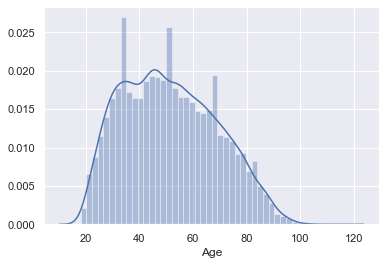

In [69]:
#Distplot to see distribution of age values.
#Distplot shows highest density of ages between the 40 to 60 mark

sns.distplot(data['Age'])

In [70]:
print(data['Age'].describe(),'\n','median = ', data['Age'].median())

count    17366.000000
mean        51.422204
std         17.456052
min         18.000000
25%         37.000000
50%         50.000000
75%         65.000000
max        116.000000
Name: Age, dtype: float64 
 median =  50.0


In [71]:
#fill missing values with median
v1 = {'Age' : 51}
data = data.fillna(value = v1)
data['Age'].describe()


count    18365.000000
mean        51.399238
std         16.974879
min         18.000000
25%         38.000000
50%         51.000000
75%         64.000000
max        116.000000
Name: Age, dtype: float64

In [72]:
#Some Consideration for Conversion to Categorical.

### Average Bill over 6 months

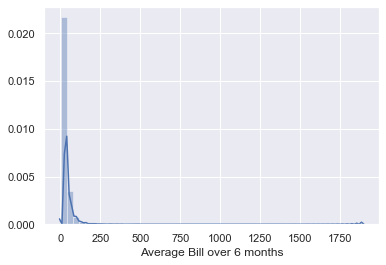

In [73]:
sns.distplot(data['Average Bill over 6 months'],norm_hist=False)

## Average Bill over 12 months
       

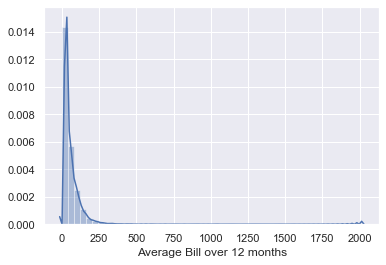

In [74]:
sns.distplot(data['Average Bill over 12 months'],norm_hist=False)

In [75]:
data[data['Average Bill over 12 months'] > 250].count()

'\n'
print('percent of data with > 250 bill =' ,236/18365)

percent of data with > 250 bill = 0.012850530901170705


In [76]:
#since only 0.013% values consist of outliers, we'll get rid of them

a = data['Average Bill over 12 months'].quantile(0.987)
data1 = data[data['Average Bill over 12 months']<a]


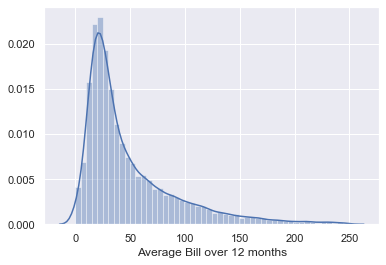

In [77]:
sns.distplot(data1['Average Bill over 12 months'])

### 'Number of defaults in last 12 bills'

In [78]:
data1['Number of defaults in last 12 bills'].value_counts()

0     6363
1     3960
2     2522
3     1710
4     1308
5      672
6      431
7      297
8      224
12     207
9      183
11     134
10     115
Name: Number of defaults in last 12 bills, dtype: int64

### Payment Method

In [79]:
data1['Payment Method'].value_counts()

Cheque          14557
Credit Card      2114
Direct Debit     1455
Name: Payment Method, dtype: int64

In [80]:
data1['Churned'].value_counts()

0    16350
1     1776
Name: Churned, dtype: int64

In [81]:
#Convert to Categorical
data2['Payment Method'] = data1['Payment Method'].map({'Cheque':0, 'Credit Card':1, 'Direct Debit':2})
data2['Payment Method'].value_counts()

0    14557
1     2114
2     1455
Name: Payment Method, dtype: int64

In [82]:
#This would look better if Age was categorized as well
pd.crosstab(data['Payment Method'],data['Age'])

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,95.0,96.0,97.0,98.0,99.0,100.0,101.0,102.0,103.0,116.0
Payment Method,,,,,,,,,,,,,,,,,,,,,
Cheque,2,18,47,90,122,107,163,171,184,206,...,15,8,7,2,3,2,1,3,1,1
Credit Card,0,2,2,8,12,13,15,14,27,34,...,1,1,0,0,0,0,0,0,0,0
Direct Debit,1,2,6,5,6,13,11,17,14,22,...,5,1,1,1,0,0,0,0,0,0


In [86]:
data2.describe()

TypeError: 'Series' objects are mutable, thus they cannot be hashed

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
  File "D:\Ana\lib\site-packages\pandas\core\generic.py", line 1799, in __hash__
    f"{repr(type(self).__name__)} objects are mutable, "
TypeError: 'Series' objects are mutable, thus they cannot be hashed


count     18127
unique        4
top           0
freq      14557
Name: Payment Method, dtype: int64

In [84]:
def bar_chart1(feature):
    Yes = data2[data2['Churned']==1][feature].value_counts()
    No = data2[data2['Churned']==0][feature].value_counts()
    df = pd.DataFrame([Yes,No])
    df.index = ['Yes','No']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [85]:
bar_chart1('Payment Method')

KeyError: 'Churned'

### District

In [ ]:
data['District'].value_counts()

### Area

In [ ]:
# Area and District seem ot be the same
data['Area'].value_counts()

### Concession Card

In [ ]:
data['Concesssion Card'].value_counts()

### Inbound Calls

In [ ]:
data['INBOUNDCALLS'].value_counts()

### Outbound Calls

In [ ]:
data['OUTBOUNDCALLS'].value_counts()

### Relationship (months)

In [ ]:
data['Relationship (months)'].value_counts()

### Occupier Status

In [ ]:
data['Occupier Status'].value_counts()

### Multiple Fuel

In [ ]:
data['Multiple Fuel'].value_counts()

### Bill Delivery Method

In [ ]:
data['Bill Delivery Method'].value_counts()

### Catrgory of Latest Complaint

In [ ]:
data['Category of latest complaint'].value_counts()

### NPS

In [ ]:
data['NPS'].value_counts()

### Product

In [ ]:
data['Product'].value_counts()

### Multiple Products

In [ ]:
data['Multiple Products'].value_counts()

### Product_New

In [ ]:
data['Product'].value_counts()

### Customer Segment

In [ ]:
data['Customer Segment'].value_counts()

### Product Category

In [ ]:
data['Product Category'].value_counts()

### Bill Amount

In [ ]:
sns.distplot(data['Bill Amount'],norm_hist=False)

In [ ]:
'District', 'Area', 'Concesssion Card',
       'INBOUNDCALLS', 'OUTBOUNDCALLS', 'Relationship (months)',
       'Occupier Status', 'Multiple Fuel', 'Bill Delivery Method', 'rpart',
       'Category of latest complaint', 'NPS', 'Product', 'Multiple Products',
       'Product_New', 'Adjusted Prob for 50% Cut-off (without Formulae)',
       'Customer Segment', 'Product Category', 'Bill Amount'],

# Feature Engineering

In [ ]:
### List out all columns

data.columns

In [ ]:
'Churned'


'Age', 'Average Bill over 12 months', 'Number of defaults in last 12 bills', 'Concesssion Card', 'Relationship (months)'
,'Category of latest complaint','NPS','Multiple Products','Customer Segment','Product Category','Bill Amount'

In [ ]:
data1 = data.copy()
data1

### Age

In [ ]:
#average of ages in the Age column.

data1['Age'].mean()

In [ ]:
#for sort to work, either store the output in another variable and display that or just inplace = true

#sorted = data.sort_values(by = 'Age', ascending = True)

#sorted

In [ ]:
#filling the NA values in Age with the mean value of Age column.
#Could also fill with median values
#data1["Age"].fillna(data1.transform("median"), inplace=True)
values = {'Age' : 51}
data1 = data1.fillna(value = values)
data1

### Mapping 'Churned' to 1 and 0

In [ ]:
#Map Yes to 1 and No to 0.


data1['Churned'] = data1['Churned'].map({'Yes':1,'No':0})


In [ ]:
data1['Churned'].describe()

In [ ]:
sns.scatterplot(y= data1['Churned'],x = data1['Customer ID'])

In [ ]:
sns.scatterplot(y= data1['Average Bill over 12 months'],x = data1['Customer ID'])

### Mapping 'Concession Card' to 1 and 0

In [ ]:
#Map Yes to 1 and No to 0.


data1['Concesssion Card'] = data1['Concesssion Card'].map({'Yes':1,'No':0})


In [ ]:
data1['Concesssion Card'].describe()

### 'Multiple Fuel'

In [ ]:
data1['Multiple Fuel'].head()

In [ ]:
data1['Multiple Fuel'] = data1['Multiple Fuel'].map({'Y':1,'N':0})


In [ ]:
data1['Multiple Fuel'].describe()

### 'Category of latest complaint'

Call Drop = 1

High Billed Amount = 2

Internet Slowness = 3

Data Charges = 4

Network Coverage = 5

In [ ]:
data1['Category of latest complaint'].value_counts()

In [ ]:
value = {'Call Drop':1,'High Billed Amount':2,'Internet Slowness':3,'Data Charges':4,'Network Coverage':5}
data1['Category of latest complaint'] = data1['Category of latest complaint'].map(value)

In [ ]:
data1['Category of latest complaint'].describe()

### Customer Segment

Independents = 1

Family & Self Development = 2

Friends, Fun & Fashion = 3

Principled Professional = 4

Small Business = 5

Entrepreneur = 6


In [ ]:
data1['Customer Segment'].value_counts()

In [ ]:
value2 = {
'Independents':1
,'Family & Self Development':2
,'Friends, Fun & Fashion':3
,'Principled Professional':4
,'Small Business':5
,'Entrepreneur':6
}

data1['Customer Segment'] = data1['Customer Segment'].map(value2)

In [ ]:
data1['Customer Segment'].describe()

### Product Category

Fixed line=1    
Mobile=2        
Internet=3      
Bundle=4        
ADSL=5          
Cable=6         

In [ ]:
data1['Product Category'].value_counts()

In [ ]:
value3 = {'Fixed line':1
,'Mobile':2
,'Internet':3
,'Bundle':4
,'ADSL':5
,'Cable':6}

data1['Product Category'] = data1['Product Category'].map(value3)

In [ ]:
data1['Product Category'].describe()

In [ ]:
data1.isnull().sum()

# Logit Regression

In [ ]:
y = data1['Churned']

estimators = ['Age','Concesssion Card','Category of latest complaint','Customer Segment','Product Category']
x1 = data1[estimators]

In [ ]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results = reg_log.fit()
results.summary()

In [ ]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [ ]:
confusion_matrix(x,y,results)

In [ ]:
(16272+329)/18553
